<a href="https://colab.research.google.com/github/kingcodes02/Time-Series-Forcasting/blob/main/4%20-%20Auto_Regressive_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.framework.config import list_physical_devices
# Import TensorFlow into Colab
import tensorflow as tf
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSSS!!!!!)


In [ ]:
!pip3 install --upgrade statsmodels

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import statsmodels

In [5]:
statsmodels.__version__

'0.13.2'

In [6]:
# load the data
df = pd.read_csv("/content/drive/MyDrive/complete-time-series/5-AutoRegressive/data/us_airline_carrier_passenger.csv")

In [7]:
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [9]:
import datetime

In [10]:
df['month'] = pd.to_datetime(df['month'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


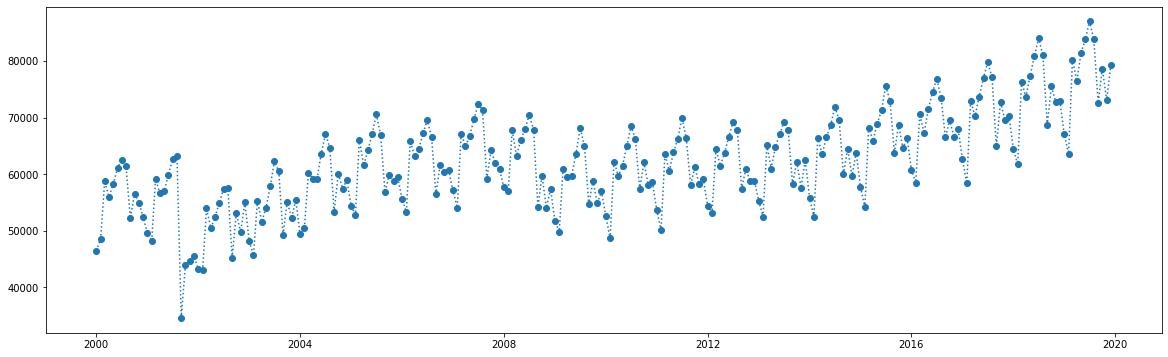

In [18]:
# visualize the data
plt.figure(figsize=(20, 6))
# sns.lineplot(x=df['month'], y=df['passengers'])
plt.plot(df['month'], df['passengers'], "o:");


**Spliting the data into train and test**

- train: upto 2016-Dec
- test: 2016-Dec to 2019-Dec

In [24]:
df_train = df[df['month'] <= datetime.datetime.strptime('2016-12-01', '%Y-%M-%d')]
df_test = df[df['month'] > datetime.datetime.strptime('2016-12-01', '%Y-%M-%d')]

In [23]:
df_train.tail()

,month,passengers
188,2015-09-01,63741
189,2015-10-01,68733
190,2015-11-01,64589
191,2015-12-01,66402
192,2016-01-01,60808


In [26]:
df_test.head()

,month,passengers
193,2016-02-01,58497
194,2016-03-01,70555
195,2016-04-01,67236
196,2016-05-01,71515
197,2016-06-01,74502


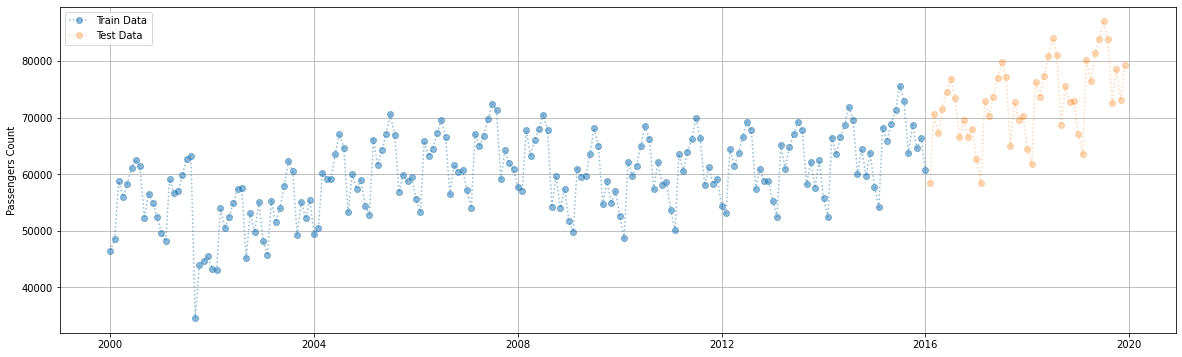

In [30]:
# visualize the data
plt.figure(figsize=(20, 6))
plt.plot(df_train['month'], df_train['passengers'], "o:", alpha=0.5)
plt.plot(df_test['month'], df_test['passengers'], "o:", alpha=0.3);

plt.legend(['Train Data', 'Test Data'])
plt.ylabel('Passengers Count')
plt.grid()

### ACF and PACF

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 0, 'Lags')

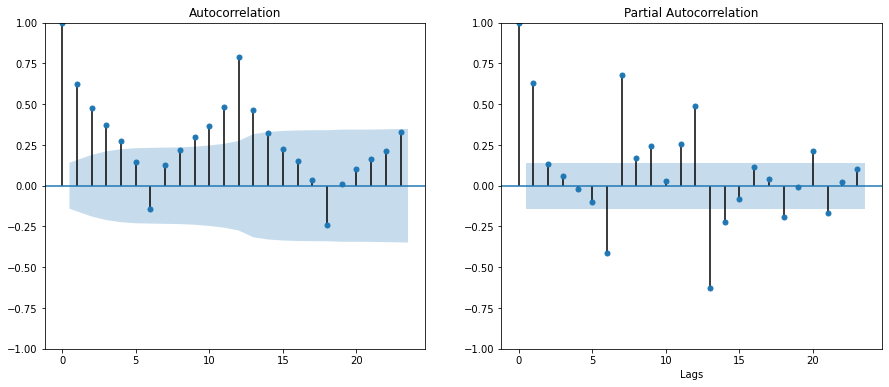

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
res1 = plot_acf(df_train['passengers'], ax=ax[0])
plt.xlabel('Lags')
res2 = plot_pacf(df_train['passengers'], ax=ax[1])
plt.xlabel('Lags')

**Making Data Stationary**

In [41]:
difference = df_train['passengers'].diff()

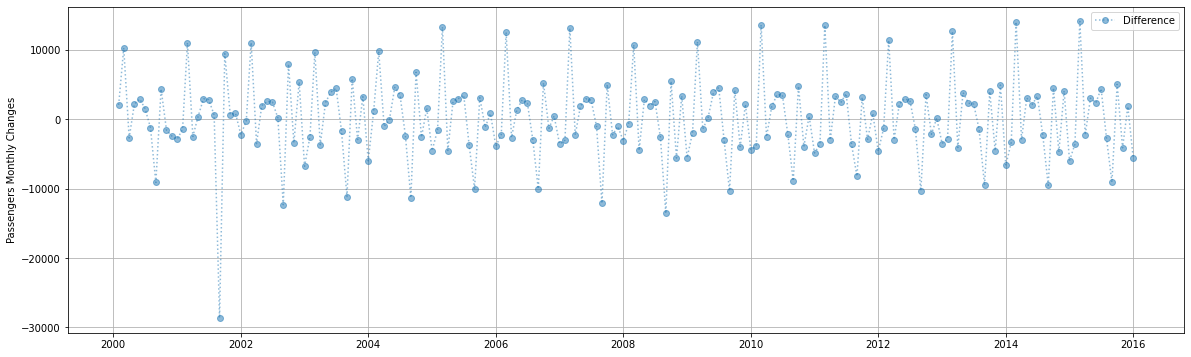

In [42]:
# visualize the data
plt.figure(figsize=(20, 6))
plt.plot(df_train['month'], difference, "o:", alpha=0.5);

plt.legend(['Difference'])
plt.ylabel('Passengers Monthly Changes')
plt.grid()

In [43]:
difference.dropna(inplace=True) # drop the missing before computing ACF anf PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 0, 'Lags')

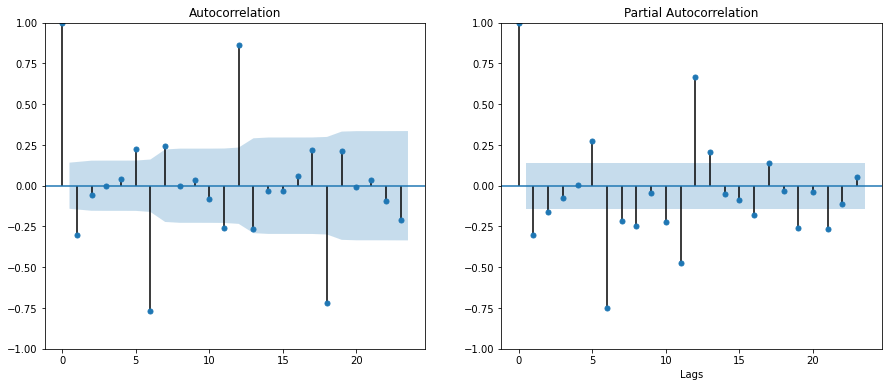

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
res1 = plot_acf(difference, ax=ax[0])
plt.xlabel('Lags')
res2 = plot_pacf(difference, ax=ax[1])
plt.xlabel('Lags')

**Clear Seasonality at 12 periods**

## Auto Regressive Model
- AR (p)

p = number of lags
- find p using PACF (find the number of lags which are not zero)

- 12 lags from PACF

AR(12)

In [46]:
x_train = df_train.set_index('month')
X_test = df_test.set_index('month')

In [47]:
from statsmodels.tsa.ar_model import AutoReg

In [49]:
model_ar = AutoReg(x_train, lags=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:             passengers   No. Observations:                  193
Model:                    AutoReg(12)   Log Likelihood               -1691.597
Method:               Conditional MLE   S.D. of innovations           2770.834
Date:                Sun, 21 Aug 2022   AIC                           3411.195
Time:                        18:59:48   BIC                           3455.974
Sample:                    01-01-2001   HQIC                          3429.349
                         - 01-01-2016                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4856   2983.513      0.000      1.000   -5846.092    5849.063
passengers.L1      0.4283      0.064      6.716      0.000       0.303       0.553
passengers.L2      0.0541      0.071

In [52]:
# fitted values
fittedvalues = model_ar.fittedvalues

In [60]:
fittedvalues.tail()

month
2015-09-01    62545.739522
2015-10-01    65843.570445
2015-11-01    62739.671373
2015-12-01    64737.233155
2016-01-01    60958.689921
dtype: float64

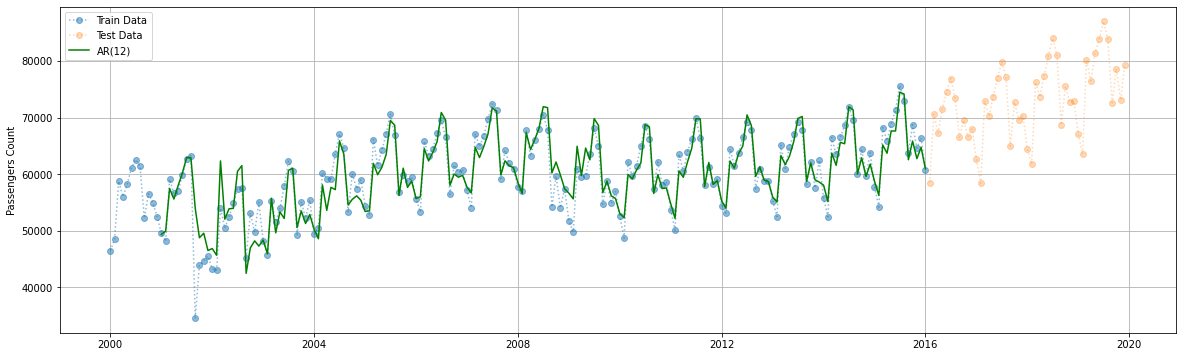

In [61]:
# visualize the data
plt.figure(figsize=(20, 6))
plt.plot(df_train['month'], df_train['passengers'], "o:", alpha=0.5)
plt.plot(df_test['month'], df_test['passengers'], "o:", alpha=0.3);
# fitted values
plt.plot(fittedvalues, 'g-')

plt.legend(['Train Data', 'Test Data', 'AR(12)'])
plt.ylabel('Passengers Count')
plt.grid()

In [58]:
start = datetime.datetime.strptime('2017-01-01', '%Y-%m-%d')
end = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
forecasted_values = model_ar.predict(start, end)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [63]:
forecasted_values.head()

2017-01-01    62037.852347
2017-02-01    61055.188858
2017-03-01    68290.739481
2017-04-01    65766.531210
2017-05-01    68718.286498
Freq: MS, dtype: float64

In [64]:
ME = 1.96 * model_ar.resid.std()

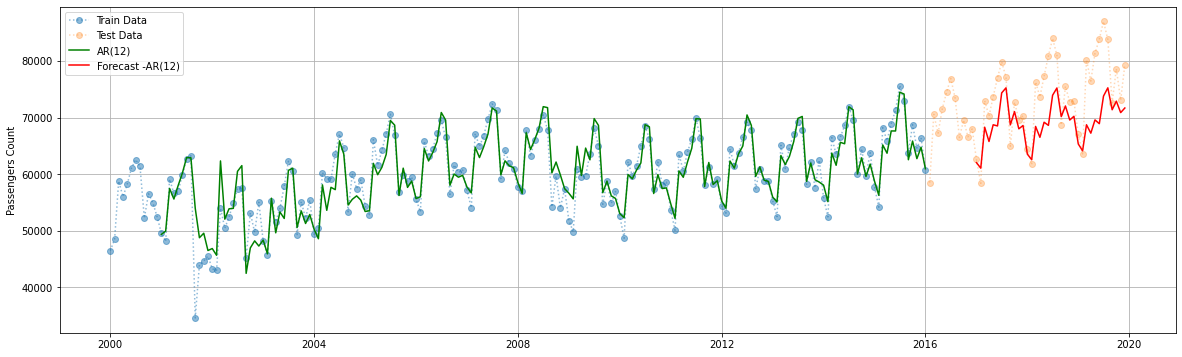

In [66]:
# visualize the data
plt.figure(figsize=(20, 6))
plt.plot(df_train['month'], df_train['passengers'], "o:", alpha=0.5)
plt.plot(df_test['month'], df_test['passengers'], "o:", alpha=0.3);
# fitted values
plt.plot(fittedvalues, 'g-')
# forecasted values
plt.plot(forecasted_values, 'r-')
# confidence
# plt.fill_between(df_test['month'], (forecasted_values.values+ME), (forecasted_values.values-ME))

plt.legend(['Train Data', 'Test Data', 'AR(12)', 'Forecast -AR(12)'])
plt.ylabel('Passengers Count')
plt.grid()

**Evaluation**

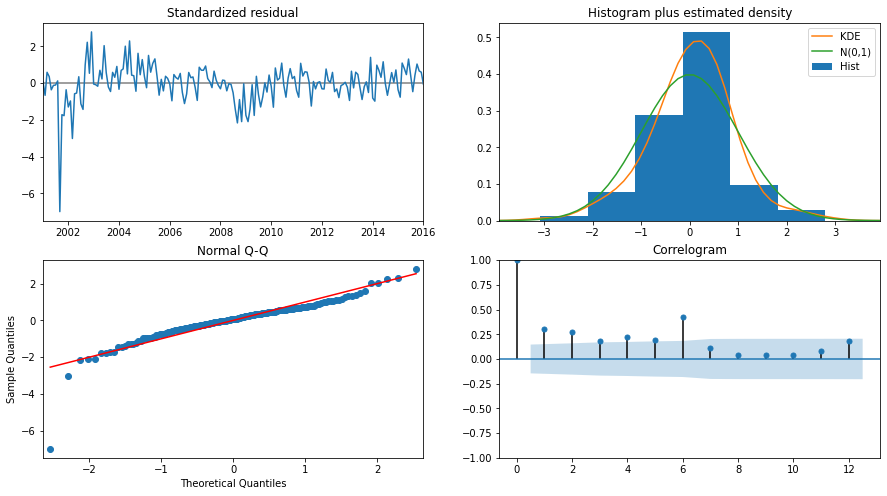

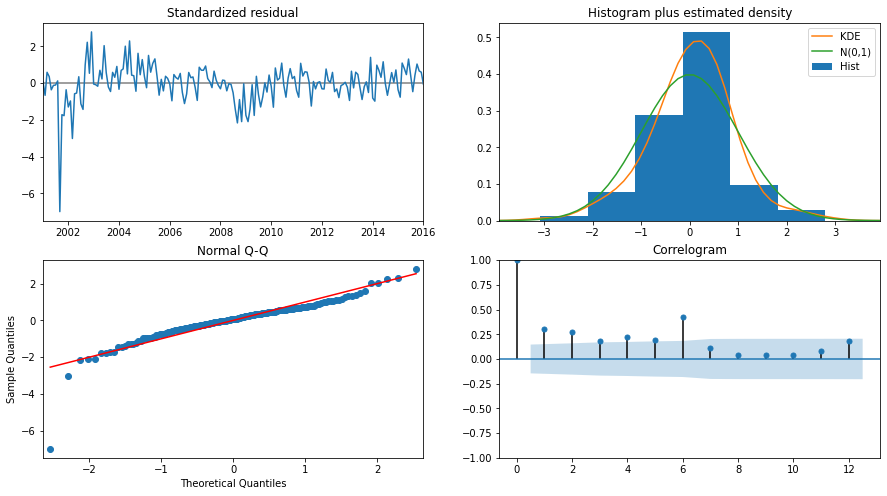

In [70]:
fig = plt.figure(figsize=(15,8))
model_ar.plot_diagnostics(lags=12, fig=fig)